In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from collections import Counter
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve)

from Lab1.classification import model_selection, accuracy
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
from scipy.stats import boxcox
from collections import Counter



In [121]:
df = pd.read_csv('/home/piotr/Workspace/DataScience/InductiveDataAnalysis/data/raw_data/glass.data')
df = df[df.columns.values[1:]]
features = df.columns[:-1].tolist()

In [12]:
df.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [123]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check the distribution of the glass types.

In [124]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

The dataset is pretty unbalanced. The instances of types 1 and 2 constitute more than 67 % of the glass types.

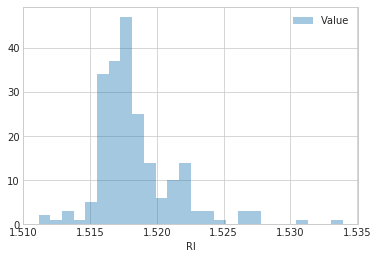

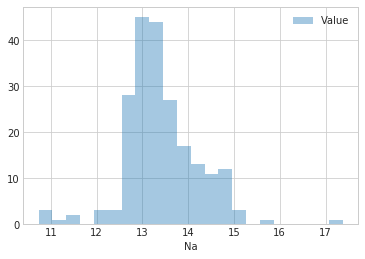

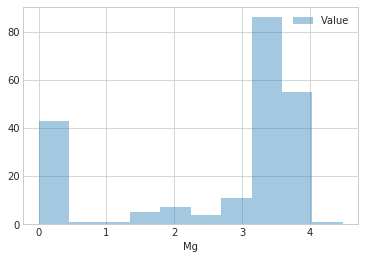

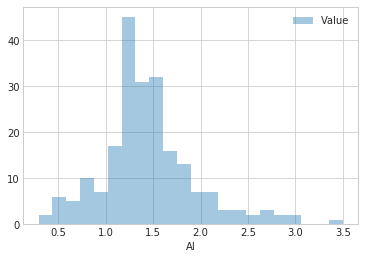

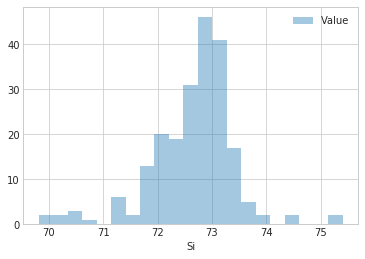

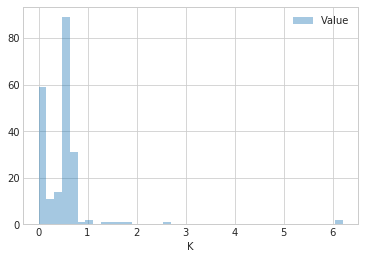

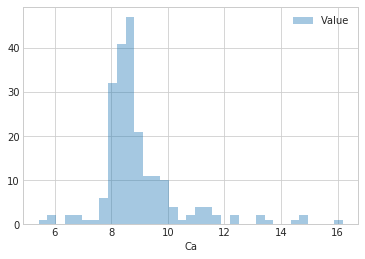

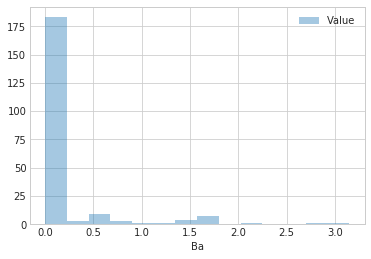

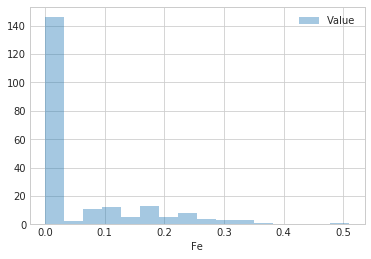

In [125]:
for feature in features:
    skew = df[feature].skew()
    sns.distplot(df[feature], kde= False, label='Value')
    plt.legend(loc='best')
    plt.show()

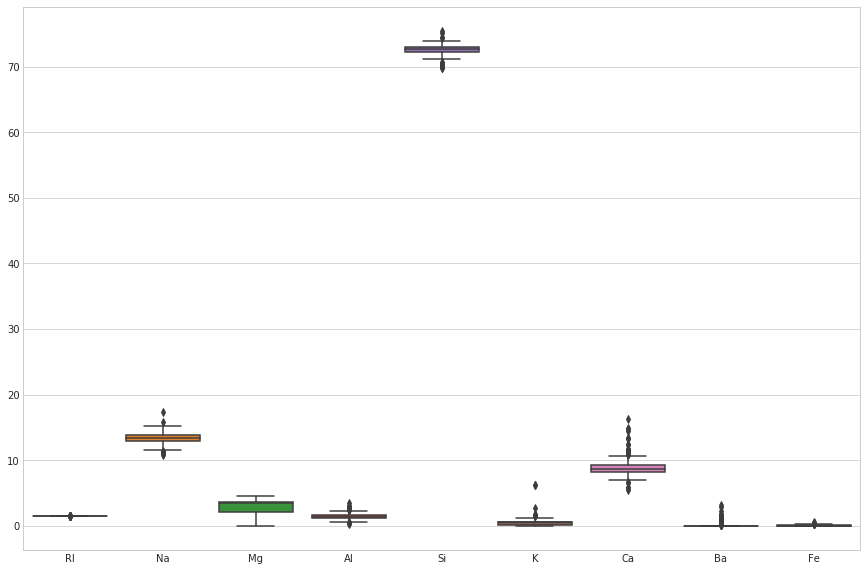

In [126]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df[features])

Unsurprisingly, Silicon has a mean that is much superior to the other constituents as we already saw in the previous section. Well, that is normal since glass is mainly based on silica.


Let's go ahead and examine a heatmap of the correlations.

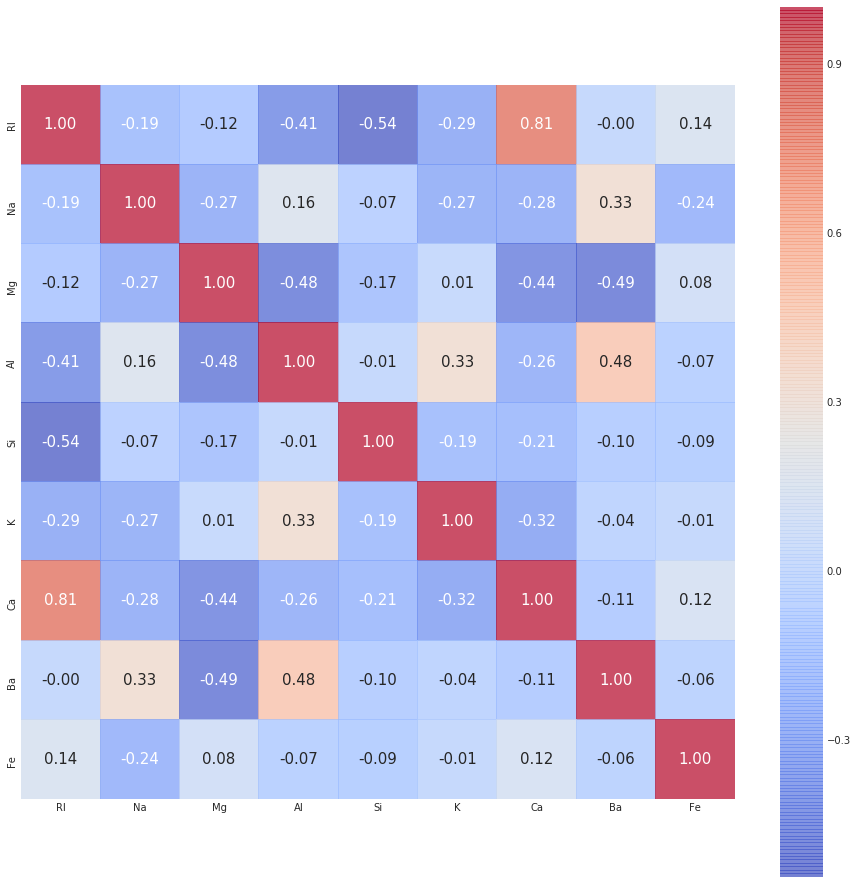

In [127]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()



There seems to be a strong positive correlation between RI and Ca. This could be a hint to perform Principal component analysis in order to decorrelate some of the input features.


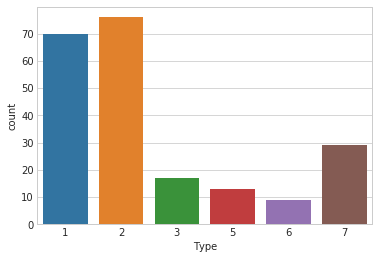

In [128]:
sns.countplot(df['Type'])

In [129]:
metrics = [accuracy, f1_score, precision_score, recall_score]
data = df[df.columns[:-1]].as_matrix()
target = df[df.columns[-1]].as_matrix()
model = GaussianNB()
print(data.shape)
result = model_selection(data, target, model, metrics, 10)

(214, 9)


/home/developers/Libraries/Python/envs/gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/developers/Libraries/Python/envs/gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/developers/Libraries/Python/envs/gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/developers/Libraries/Python/envs/gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 

In [130]:
def make_value(value):
    return "{0:.4f} +/- {1:.4f}".format(value[0], value[1])

scores = pd.DataFrame(columns=['Raw Data'], 
                  index=['accuracy','f1_score','precission'])

scores['Raw Data'] = pd.Series({'accuracy': make_value(result[accuracy]), 
                            'f1_score': make_value(result[f1_score]), 
                            'precission': make_value(result[precision_score]), 
                            'recall': make_value(result[recall_score])})

In [131]:
scores

,Raw Data
accuracy,0.4487 +/- 0.0117
f1_score,0.4117 +/- 0.0061
precission,0.4387 +/- 0.0117
